<a href="https://colab.research.google.com/github/FabianPizzatti/ProyectoEvaluacionAprender2023/blob/Actualizacion_de_proyecto/PreentregaProyecto_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TEMATICA
El data set elegido es sobre las "Evaluaciones Aprender", estas son un dispositivo de evaluación nacional elaborado por el Ministerio de Educación de la Nación con el objetivo de relevar información oportuna y de calidad sobre los logros alcanzados y los desafíos pendientes del sistema educativo del país.
Para este analisis se toman las evaluaciones realizadas en el año 2023. Las mismas son realizadas a todos los etudiantes de 6 año de la primaria en todo el territorio nacional.

#DESAFIO
Para esta primera entrega se intento analizar el dataset, identificando todas las variables y datos que contiene el mismo con el fin de encontrar patrones que puedan afectar al desempeño de los alumnos en las materias de matemáticas y lenguas.
Las primeras preuntas que surgieron fueron:


*   Las tareas de cuidado de un familiar estan principalmente encargadas a las mujeres ?
*   Si hay un desempeño similar en ambas materias ?
*



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Carga de librerías principales para la carga de datos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('/content/drive/MyDrive/CURSO DATA CODER/Base_estudiantes_FINAL_v1.csv', sep=';')

df.head(5)

<ipython-input-4-3d2fb1c47cf4>:1: DtypeWarning: Columns (207) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/drive/MyDrive/CURSO DATA CODER/Base_estudiantes_FINAL_v1.csv', sep=';')


,ID1,Código de Jurisdicción,Código de Jurisdicción_Nombre,seccion,idalumno,Sector de gestión,ambito,¿Cuántos años tenés?,¿Cuál es el mes de tu cumpleaños?,¿Cuál es el mes de tu cumpleaños?.1,...,Puntaje Matemática,Nivel socioeconómico puntaje,Nivel socioeconómico Nivel,Edad a Junio 2023,Configuración familiar migrante,Sobreedad,Máximo nivel educativo madre o adulta responsable,Máximo nivel educativo padre o adulto responsable,Región Educativa,Índice de Clima Escolar
0,"4,00E+14",2,Ciudad Autónoma de Buenos Aires,1,382443,Privado,Urbano,11 años,1,2,...,"490,57321","0,51995504",MEDIO,2,2,NO,Secundaria incompleta,Secundaria incompleta,CENTRO,2
1,"4,00E+14",2,Ciudad Autónoma de Buenos Aires,2,382414,Privado,Urbano,11 años,7,2,...,"427,08548","-0,3688803",MEDIO,1,2,NO,Secundaria incompleta,Secundaria incompleta,CENTRO,2
2,"4,00E+14",2,Ciudad Autónoma de Buenos Aires,1,382444,Privado,Urbano,12 años,8,1,...,"518,6004","0,69449478",MEDIO,2,2,NO,Terciario/universitario/posgrado completo,Terciario/universitario/posgrado completo,CENTRO,2
3,"4,00E+14",2,Ciudad Autónoma de Buenos Aires,1,382445,Privado,Urbano,12 años,9,1,...,"463,10779","-0,022666669",MEDIO,2,2,NO,Secundaria incompleta,Terciario/universitario/posgrado completo,CENTRO,2
4,"4,00E+14",2,Ciudad Autónoma de Buenos Aires,1,382446,Privado,Urbano,11 años,3,2,...,"498,74396","0,41116619",MEDIO,2,2,NO,Secundaria incompleta,Secundaria completa,CENTRO,2


In [5]:
# analizo la cantidad de filas y columnas que tiene el data set

df.shape

(642006, 208)

In [6]:
# analizo la cantidad de nulos de las columnas

df.isnull().sum()

,0
ID1,0
Código de Jurisdicción,0
Código de Jurisdicción_Nombre,0
seccion,0
idalumno,0
...,...
Sobreedad,0
Máximo nivel educativo madre o adulta responsable,0
Máximo nivel educativo padre o adulto responsable,0
Región Educativa,0


In [7]:
# tipo de datos por columna
df.dtypes

,0
ID1,object
Código de Jurisdicción,int64
Código de Jurisdicción_Nombre,object
seccion,int64
idalumno,int64
...,...
Sobreedad,object
Máximo nivel educativo madre o adulta responsable,object
Máximo nivel educativo padre o adulto responsable,object
Región Educativa,object


In [8]:
#Para poder analizar todas las columnas realizo lo siguiente:
for c in df.columns:
    print(c, df[c].dtype)

ID1 object
Código de Jurisdicción int64
Código de Jurisdicción_Nombre object
seccion int64
idalumno int64
Sector de gestión object
ambito object
¿Cuántos años tenés? object
¿Cuál es el mes de tu cumpleaños? object
¿Cuál es el mes de tu cumpleaños?.1 object
¿Cuál es el sexo que aparece en tu DNI? object
¿En qué país naciste? object
Durante tu tiempo libre, ¿hacés lo siguiente? Usar redes sociales object
Durante tu tiempo libre, ¿hacés lo siguiente? Ver series, películas o videos object
Durante tu tiempo libre, ¿hacés lo siguiente? Leer libros que no te dieron tus maestras o maestros de la escuela object
Durante tu tiempo libre, ¿hacés lo siguiente? Realizar actividades artísticas, deportivas, físicas o juegos al aire libre object
Durante tu tiempo libre, ¿hacés lo siguiente? Juntarte con amigas y amigos object
Durante tu tiempo libre, ¿hacés lo siguiente? Jugar de manera digital (online u offline) object
Durante tu tiempo libre, ¿hacés lo siguiente? Aprender idiomas fuera de la escuela 

In [9]:
#Se eliminan filas con valor vacio segun columna 'Puntaje Lengua' ya que es un dato basico para el analisis que se intentara realizar en este proyecto
df.drop(df.loc[df['Puntaje Lengua']==' '].index, inplace=True)

In [10]:
# se verifica que realamente no existan valores vacios
df['Puntaje Lengua'].isnull().sum()

0

In [11]:
#Se realiza lo mismo con la columna 'Puntaje Matemática' (se eliminan filas con nulos)
df.drop(df.loc[df['Puntaje Matemática']==' '].index, inplace=True)


In [12]:
df['Puntaje Matemática'].isnull().sum()

0

In [13]:
#'Puntaje Lengua' y 'Puntaje Matem´atica' tienen como divisor de decimanes la ",", por lo cual se procede a reemplazar la misma por un punto y
#asi convertir dichas columnas en una variable numerica.
df['Puntaje Lengua'] = pd.to_numeric(df['Puntaje Lengua'].str.replace(',','.'))
df['Puntaje Lengua']

,Puntaje Lengua
0,542.44171
1,421.36099
2,527.59174
3,554.87384
4,567.84747
...,...
641996,546.14343
641997,533.32550
641998,349.75049
641999,580.38934


In [14]:
df['Puntaje Matemática'] = pd.to_numeric(df['Puntaje Matemática'].str.replace(',','.'))
df['Puntaje Matemática']

,Puntaje Matemática
0,490.57321
1,427.08548
2,518.60040
3,463.10779
4,498.74396
...,...
641996,599.83722
641997,536.38678
641998,481.33319
641999,526.15259


In [15]:
# se procede a crear variables que representan el promedio de las columnas Puntaje Matemática y Puntaje Lengua
Prom_mat= df['Puntaje Matemática'].mean()
print (Prom_mat)
Prom_lengua= df['Puntaje Lengua'].mean()
print (Prom_lengua)

477.2117130684271
499.279602684402


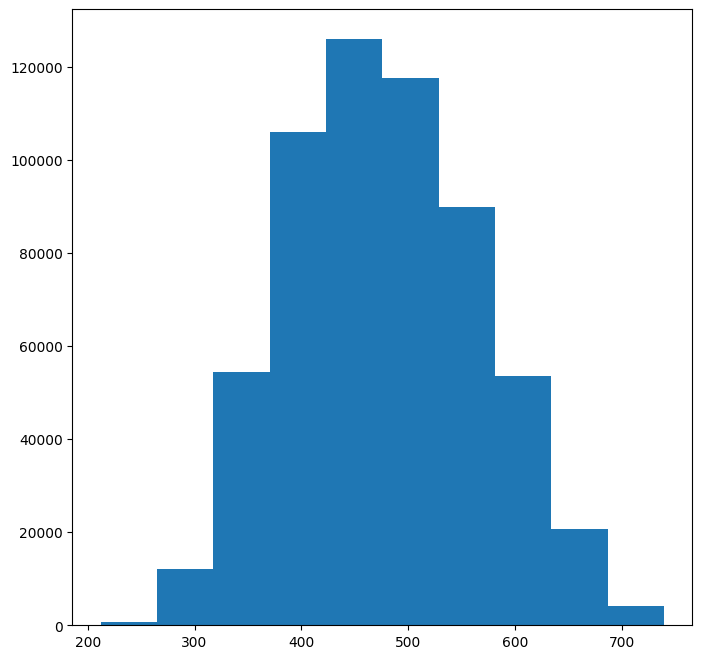

In [18]:
# Analizo a traves de un histograma la ditribucion de la variable "Puntaje Matemáticas" y "Puntaje Lengua".
plt.figure(figsize=(8,8))
plt.hist(df["Puntaje Matemática"])
plt.show()

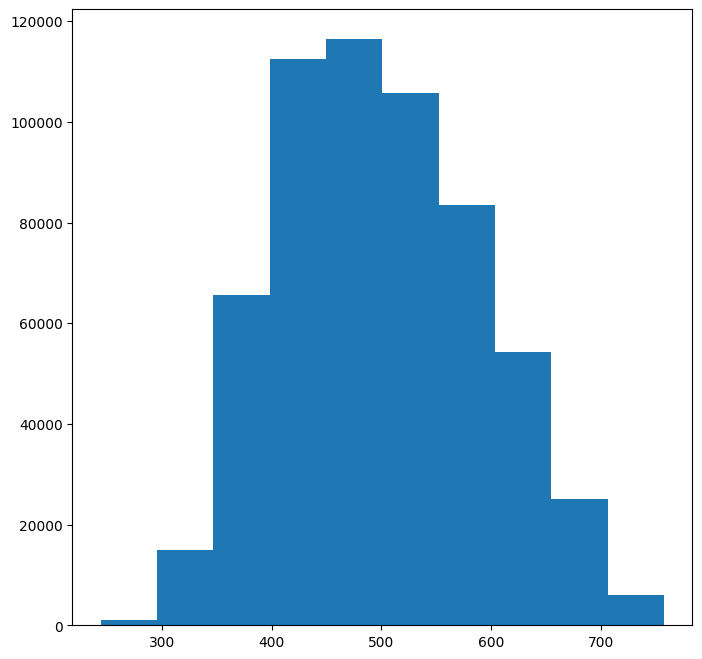

In [19]:
plt.figure(figsize=(8,8))
plt.hist(df["Puntaje Lengua"])
plt.show()

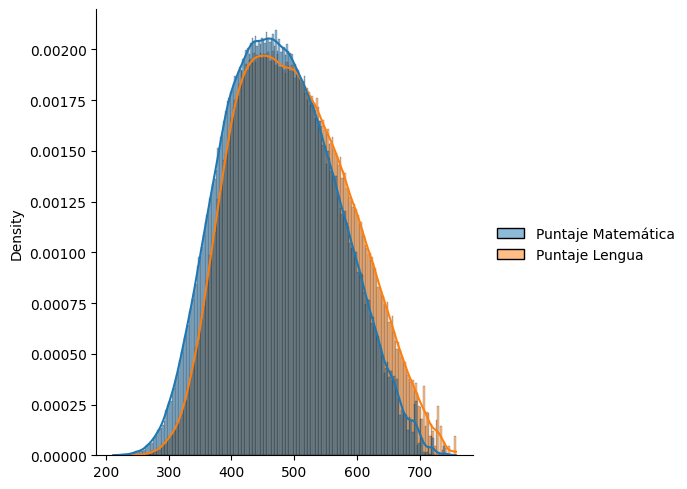

In [21]:
sns.displot(df[["Puntaje Matemática",'Puntaje Lengua']], kde=True, stat="density")


Se puede obserbar que la dispersion es algo similar entre ambos puntanajes, con un leve mejor desempeño para las evaluaciones de lengua

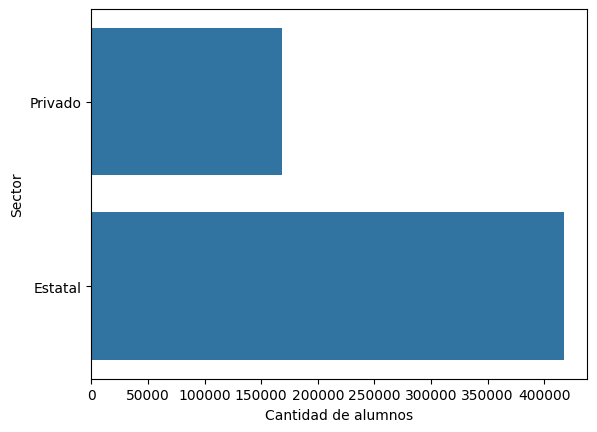

In [30]:
# Se analiza la cantidad de alumnos correspondientes a cada sector
sns.countplot(df['Sector de gestión'])
plt.xlabel("Cantidad de alumnos")
plt.ylabel("Sector")
plt.show()

se puede obsebvar que el sector estatal es el principal, mas que duplicando a los alumnos que se desempeñan en el sector privado.

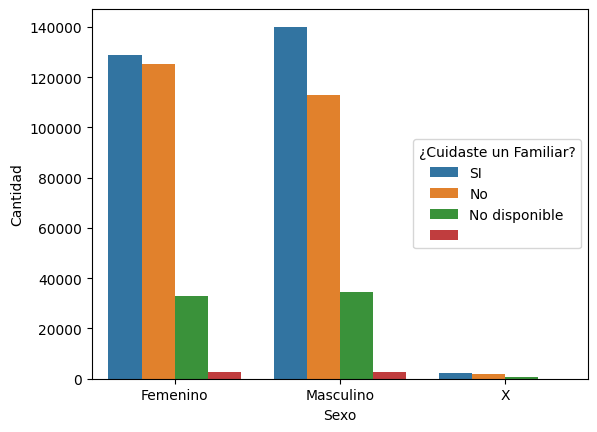

In [23]:
# Se intenta analizar si la tarea de cuidado de un familiar recae principalmente en las mujeres, idea previa que no fue validada en base a la informacion arrojada por el grafico.
sns.countplot (x= "¿Cuál es el sexo que aparece en tu DNI?" , hue = "La semana pasada, ¿hiciste lo siguiente? ¿por cuánto tiempo?  [Cuidar a un familiar]" , data=df)
plt.legend(loc='center right', title='¿Cuidaste un Familiar?')
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.show()

Text(0.5, 1.0, 'Relacion entre ambos puntajes')

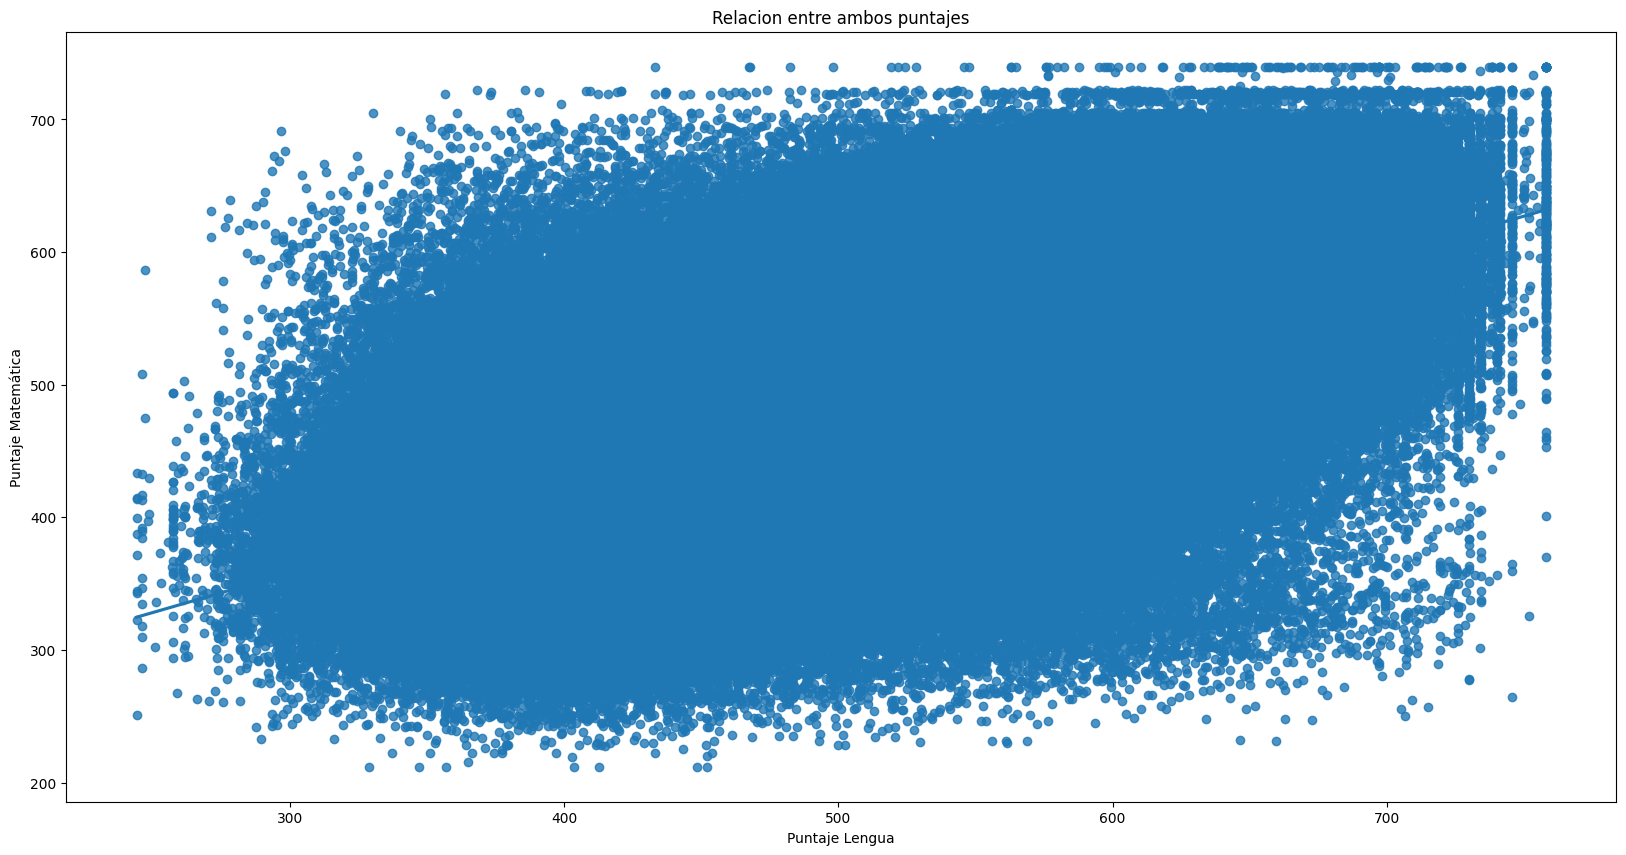

In [22]:
# se intenta determinar si hay relacion entre el puntaje obtenido para matemaricas con respecto al obtenido en lengua
plt.figure(figsize=(20,10))
ax = sns.regplot(x="Puntaje Lengua", y="Puntaje Matemática", data=df)
ax.set(xlabel='Puntaje Lengua', ylabel='Puntaje Matemática')
plt.title('Relacion entre ambos puntajes')

al distribucion de los datos es bastante homegenea y se puede terminar que hay una minima tendencia que determina que a mejor desempeño en matematicas hay un mejor desempeño en lenguas.